# Assignment 3 - Genome Assembly
## Graph Algorithms

## Learning Outcomes
* Understand genome assembly bioinformatics motivation
* Apply, analyze, and evaluate genome sequence alignment graph based algorithms

In this assignment, we will:
1. Verify that your solutions for exercises in Topic 3 are implemented correctly
2. Extend these solutions
3. Apply them to scenarios of both success and failure

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2


import pandas as pd
import numpy as np

import Assignment3_helper 

from pathlib import Path
home = str(Path.home()) # all other paths are relative to this path. 
# This is not relevant to most people because I recommended you use my server, but
# change home to where you are storing everything. Again. Not recommended.

**Exercise 1** String composition problem: Generate the k-mer composition of a string.
    
Input: An integer $k$ and a string $text$.

Output: The lexicographic ordered collection of all k-mer substrings in text (including repeated k-mers) ``composition(k,text)``, where the k-mers are arranged in lexicographic order.

Example: ``composition(3,TATGGGGTGC)`` => [ATG, GGG, GGG, GGT, GTG, TAT, TGC, TGG]. Notice how there are two entries for GGG, so we keep duplicates.

Learning objective: Build up the skills and vocabulary we need to solve the reconstruction problem.

In [2]:
kmers = Assignment3_helper.composition(3,"TATGGGGTGC")
kmers

['ATG', 'GGG', 'GGG', 'GGT', 'GTG', 'TAT', 'TGC', 'TGG']

**Exercise 2** Construct the de Bruijn graph from a set of k-mers.

Input: a collection of $k$-mers ``patterns``.

Output: NetworkX directed graph that corresponds to the adjacency list of the de Bruijn graph. 

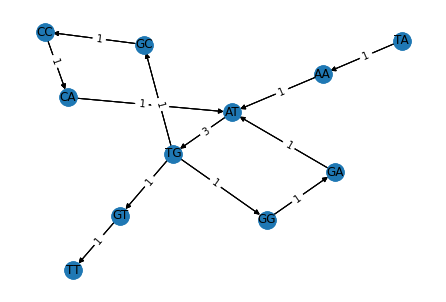

In [3]:
dB = Assignment3_helper.de_bruijn(["AAT","ATG","ATG","ATG","CAT","CCA","GAT","GCC","GGA","GGG","GTT","TAA","TGC","TGG","TGT"])
Assignment3_helper.show(dB)

In [4]:
Assignment3_helper.to_adj(dB)

,AA,AT,TG,CA,CC,GA,GC,GG,GT,TT,TA
AA,0,1,0,0,0,0,0,0,0,0,0
AT,0,0,3,0,0,0,0,0,0,0,0
TG,0,0,0,0,0,0,1,1,1,0,0
CA,0,1,0,0,0,0,0,0,0,0,0
CC,0,0,0,1,0,0,0,0,0,0,0
GA,0,1,0,0,0,0,0,0,0,0,0
GC,0,0,0,0,1,0,0,0,0,0,0
GG,0,0,0,0,0,1,0,1,0,0,0
GT,0,0,0,0,0,0,0,0,0,1,0
TT,0,0,0,0,0,0,0,0,0,0,0


**Exercise 3** Given a Eulerian directed graph, find the Eulerian cycle.

Given: An Eulerian directed graph, in the form of a MultiDiGraph networkx object.

Return: An Eulerian cycle in this graph returned as a list.

Random start
[0, 3, 2, 6, 8, 7, 9, 6, 5, 4, 2, 1, 0]
Start at specific node
[6, 5, 4, 2, 1, 0, 3, 2, 6, 8, 7, 9, 6]


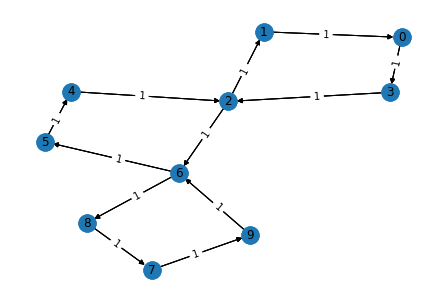

In [5]:
# Print example with random start
cycle = Assignment3_helper.eulerian_cycle(Assignment3_helper.G)
Assignment3_helper.show(Assignment3_helper.G)
print("Random start")
print(cycle)

# Example with start node specified
cycle = Assignment3_helper.eulerian_cycle(Assignment3_helper.G,start=6)

print("Start at specific node")
print(cycle) # Should also result in a shifted but equivalent answer. 

# If your code isn't working, please carefully read the section on the ant 
# moving around the graph and getting stuck :)

## Eulerian path
Consider the following graph that does not contain a Eulerian cycle.

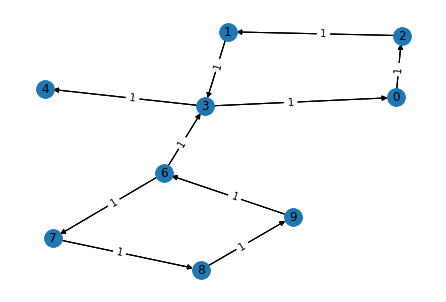

In [6]:
Assignment3_helper.show(Assignment3_helper.G2)

Consider the following function that finds the in and out degree of every node.

In [7]:
Assignment3_helper.calc_in_out(Assignment3_helper.G2)

,in,out
0,1,1
1,1,1
2,1,1
3,2,2
4,1,0
6,1,2
7,1,1
8,1,1
9,1,1


Is there "nearly" a cycle? If so, how would you find it? What two nodes would you connect?

**Exercise 4** Given a Eulerian directed graph, find the Eulerian path.

Given: An Eulerian directed graph, in the form of a MultiDiGraph networkx object.

Return: An Eulerian cycle in this graph returned as a list.

Hint: Can you find the correct starting node from the output of ``in_out``?

In [8]:
path = Assignment3_helper.eulerian_path(Assignment3_helper.G2)
path

[6, 7, 8, 9, 6, 3, 0, 2, 1, 3, 4]

We can finally put everything together!

**Exercise 5:** Reconstruct a string from its k-mer composition.

Given: Given a list of $k$-mers patterns.

Return: A string ``text`` with $k$-mer composition equal to patterns.

In [9]:
assembly = Assignment3_helper.reconstruct(Assignment3_helper.kmers)
assembly

'GGCTTACCA'

In [10]:
# Don't forget to push!

## Important notes
Problems below are not autograded.

They do require you to copy your align_dynamic2 function into the Assignment3_helper.py in order to get the print outs. It also requires you to copy your function for reading a FASTA file.

We've written the bones of a modern assembly algorithm.

In [11]:
seq="TATGGGGTGC"
kmers = Assignment3_helper.composition(3,seq)
assembled_seq=Assignment3_helper.reconstruct(kmers)
assembled_seq

'TATGGGGTGC'

We have an alignment algorithm so we can check it out:

In [12]:
sc,s1,s2=Assignment3_helper.align_dynamic2(seq,assembled_seq)
Assignment3_helper.print_alignment(s1,s2)

TATGGGGTGC
||||||||||
TATGGGGTGC


Looks like we solved it! Time to go home...

Let's take a look at Yeast's genome. We will read in all the chromosomes, but for simplicity we will focus on the first 1,000 nucleotides of the first chromosome.

In [13]:
headers,seqs=Assignment3_helper.read_fasta(f'{home}/csc-448-student/data/GCF_000146045.2_R64_genomic.fna')
headers[0]

'>NC_001133.9 Saccharomyces cerevisiae S288C chromosome I, complete sequence'

In [14]:
ch1_first_1000 = seqs[0][:1000].upper()

In [15]:
ch1_first_1000

'CCACACCACACCCACACACCCACACACCACACCACACACCACACCACACCCACACACACACATCCTAACACTACCCTAACACAGCCCTAATCTAACCCTGGCCAACCTGTCTCTCAACTTACCCTCCATTACCCTGCCTCCACTCGTTACCCTGTCCCATTCAACCATACCACTCCGAACCACCATCCATCCCTCTACTTACTACCACTCACCCACCGTTACCCTCCAATTACCCATATCCAACCCACTGCCACTTACCCTACCATTACCCTACCATCCACCATGACCTACTCACCATACTGTTCTTCTACCCACCATATTGAAACGCTAACAAATGATCGTAAATAACACACACGTGCTTACCCTACCACTTTATACCACCACCACATGCCATACTCACCCTCACTTGTATACTGATTTTACGTACGCACACGGATGCTACAGTATATACCATCTCAAACTTACCCTACTCTCAGATTCCACTTCACTCCATGGCCCATCTCTCACTGAATCAGTACCAAATGCACTCACATCATTATGCACGGCACTTGCCTCAGCGGTCTATACCCTGTGCCATTTACCCATAACGCCCATCATTATCCACATTTTGATATCTATATCTCATTCGGCGGTCCCAAATATTGTATAACTGCCCTTAATACATACGTTATACCACTTTTGCACCATATACTTACCACTCCATTTATATACACTTATGTCAATATTACAGAAAAATCCCCACAAAAATCACCTAAACATAAAAATATTCTACTTTTCAACAATAATACATAAACATATTGGCTTGTGGTAGCAACACTATCATGGTATCACTAACGTAAAAGTTCCTCAATATTGCAATTTGCTTGAACGGATGCTATTTCAGAATATTTCGTACTTACACAGGCCATACATTAGAATAATATGTCACATCACTGTCGTAACACTCTTTATTCACCGAGCAATAATACGGTAGTGGCTCAAACTCATGCGGGTGCTATG

**Problem 1:** Do you think we will get the correct assembly using the same parameters and functions that were so successful above? Explain your answer and your reasoning.

**Your answer here**

In [16]:
kmers = Assignment3_helper.composition(3,ch1_first_1000)
assembled_seq=Assignment3_helper.reconstruct(kmers)
assembled_seq

'CCTGATGATGATGATGATGATCGTAGTAGTAGTACTGAGTACTCCTCCTCCTCCTCCTCCTCCTCCTCCTCCTCCTCCTCCTCCTCCTCCTCCGTACTCATCATCATCATCATCATCATCATCATCATCATCATCATCATCATCATCATCATCATCATACTCATACTCATACTCATACTCATACTCATACTCATACTCATACTCATACTACTACTACTACTACTACTACTACTACTACTACTACTACTACTACTACTACTACTACTACTACTACTACGGGCCGGCCGGCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCATACGGCCATACGGCCATACGGCCATACGGCATACGGACGCATACGCATACGCATACGAATACGAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAAGGAACCAGCAGCAGCAGCAGAACCAGAACCAGAACCAGAACCACCACCACCACCACCACCACCACCACCACCACCACCACCACCACCACCACCACCACCACCACCACCACCACCACCACCACCACCACCACCACCACCACCACCACCACCACCACCACCACCACCACCACCACCACACACACACACACACACACACACACACACACACACACACACACACACACAACAACAACAACAACAACAACAACAACAACAACAACAACAACAACAACAACAAAAAAAAAAAAAAAAAAAAAATTTTTTTTTTTTTTTTTGTTGTTGTTGTTGTTGTGTGTGTGTGGTCTTGGTCTTGGTCTTGGTCTTGGTCTTGGTCTTCTTCTTCTTCTTCTTCTTCTTCTTCTTCGTCGTATTCGTATTCGTATTATTATTATTATTATTATTATTATTATTATTATTATTATTATTATTATTATTATTATTATGCTTATGCTTATGCTTATGCTTATGCTGCTGCTGCTGCGTATGCGTATGCGTATGCCTGCCTGCCTGCCTGCCTG

In [17]:
Assignment3_helper.print_alignment(ch1_first_1000,assembled_seq,num_to_print=50)

CCACACCACACCCACACACCCACACACCACACCACACACCACACCACACC
||  |  |     |                |  ||  |  || || |  |
CCTGATGATGATGATGATGATCGTAGTAGTAGTACTGAGTACTCCTCCTC
CACACACACACATCCTAACACTACCCTAACACAGCCCTAATCTAACCCTG
| |   | |     |   | |  ||    |     |||  ||    |   
CTCCTCCTCCTCCTCCTCCTCCTCCTCCTCCTCCTCCTCCTCCGTACTCA
GCCAACCTGTCTCTCAACTTACCCTCCATTACCCTGCCTCCACTCGTTAC
 |       ||       | | | ||     |     |  ||       |
TCATCATCATCATCATCATCATCATCATCATCATCATCATCATCATCATC
CCTGTCCCATTCAACCATACCACTCCGAACCACCATCCATCCCTCTACTT
    ||  | |||  |  |          |   |    |  | |   | |
ATCATCATACTCATACTCATACTCATACTCATACTCATACTCATACTCAT
ACTACCACTCACCCACCGTTACCCTCCAATTACCCATATCCAACCCACTG
|||   |||    |  |     |  | | |    |   | | ||      
ACTCATACTACTACTACTACTACTACTACTACTACTACTACTACTACTAC
CCACTTACCCTACCATTACCCTACCATCCACCATGACCTACTCACCATAC
        |      |    |||| |    ||        | | ||   |
TACTACTACTACTACTACTACTACTACGGGCCGGCCGGCCCCCCCCCCCC
TGTTCTTCTACCCACCATATTGAAACGCTAACAAATGATCGTAAATAACA
    |  |  ||| ||    |    |  || 

How does that look to you? Take a look at all C's in a row. And all the T's and the altnerating AC's. Ahhh....

The real question is not whether this assembly is wrong (it clearly is), but the question is what caused this problem? There are a number of things to consider:
1. It could be a bug in our program (it isn't :)
2. It could be that our program returned one of many possible assemblies (ding ding ding!). 

It is the second complication. With a small $k$-mer value we run the risk of too much variability in the assemblies that are possible. 

**Problem 2:** See how the results change as you increase the $k$ value:

In [18]:
kmers=Assignment3_helper.composition(11,ch1_first_1000)
assembled_seq=Assignment3_helper.reconstruct(kmers)
assembled_seq

'CCACACCACACCCACACACCCACACACCACACCACACCACACACCACACCCACACACACACATCCTAACACTACCCTAACACAGCCCTAATCTAACCCTGGCCAACCTGTCTCTCAACTTACCCTCCATTACCCTGCCTCCACTCGTTACCCTGTCCCATTCAACCATACCACTCCGAACCACCATCCATCCCTCTACTTACTACCACTCACCCACCGTTACCCTCCAATTACCCATATCCAACCCACTGCCACTTACCCTACCATTACCCTACCATCCACCATGACCTACTCACCATACTGTTCTTCTACCCACCATATTGAAACGCTAACAAATGATCGTAAATAACACACACGTGCTTACCCTACCACTTTATACCACCACCACATGCCATACTCACCCTCACTTGTATACTGATTTTACGTACGCACACGGATGCTACAGTATATACCATCTCAAACTTACCCTACTCTCAGATTCCACTTCACTCCATGGCCCATCTCTCACTGAATCAGTACCAAATGCACTCACATCATTATGCACGGCACTTGCCTCAGCGGTCTATACCCTGTGCCATTTACCCATAACGCCCATCATTATCCACATTTTGATATCTATATCTCATTCGGCGGTCCCAAATATTGTATAACTGCCCTTAATACATACGTTATACCACTTTTGCACCATATACTTACCACTCCATTTATATACACTTATGTCAATATTACAGAAAAATCCCCACAAAAATCACCTAAACATAAAAATATTCTACTTTTCAACAATAATACATAAACATATTGGCTTGTGGTAGCAACACTATCATGGTATCACTAACGTAAAAGTTCCTCAATATTGCAATTTGCTTGAACGGATGCTATTTCAGAATATTTCGTACTTACACAGGCCATACATTAGAATAATATGTCACATCACTGTCGTAACACTCTTTATTCACCGAGCAATAATACGGTAGTGGCTCAAACTCATGCGGGTGCTATG

In [19]:
Assignment3_helper.print_alignment(ch1_first_1000,assembled_seq,num_to_print=50)

CCACACCACACCCACACACCCACACACCACACCACACACCACACCACACC
|||||||||||||||||||||||||||||||||||||  |||||||||||
CCACACCACACCCACACACCCACACACCACACCACACCACACACCACACC
CACACACACACATCCTAACACTACCCTAACACAGCCCTAATCTAACCCTG
||||||||||||||||||||||||||||||||||||||||||||||||||
CACACACACACATCCTAACACTACCCTAACACAGCCCTAATCTAACCCTG
GCCAACCTGTCTCTCAACTTACCCTCCATTACCCTGCCTCCACTCGTTAC
||||||||||||||||||||||||||||||||||||||||||||||||||
GCCAACCTGTCTCTCAACTTACCCTCCATTACCCTGCCTCCACTCGTTAC
CCTGTCCCATTCAACCATACCACTCCGAACCACCATCCATCCCTCTACTT
||||||||||||||||||||||||||||||||||||||||||||||||||
CCTGTCCCATTCAACCATACCACTCCGAACCACCATCCATCCCTCTACTT
ACTACCACTCACCCACCGTTACCCTCCAATTACCCATATCCAACCCACTG
||||||||||||||||||||||||||||||||||||||||||||||||||
ACTACCACTCACCCACCGTTACCCTCCAATTACCCATATCCAACCCACTG
CCACTTACCCTACCATTACCCTACCATCCACCATGACCTACTCACCATAC
||||||||||||||||||||||||||||||||||||||||||||||||||
CCACTTACCCTACCATTACCCTACCATCCACCATGACCTACTCACCATAC
TGTTCTTCTACCCACCATATTGAAACGCTAACAAATGATCGTAAATAACA
|||||||||||||||||||||||||||||||

Well that's better! But there are still a couple of errors. Try increasing the k-value and see if we can correct the problem.

In [20]:
kmers=Assignment3_helper.composition(13,ch1_first_1000)
assembled_seq=Assignment3_helper.reconstruct(kmers)
assembled_seq

'CCACACCACACCCACACACCCACACACCACACCACACACCACACCACACCCACACACACACATCCTAACACTACCCTAACACAGCCCTAATCTAACCCTGGCCAACCTGTCTCTCAACTTACCCTCCATTACCCTGCCTCCACTCGTTACCCTGTCCCATTCAACCATACCACTCCGAACCACCATCCATCCCTCTACTTACTACCACTCACCCACCGTTACCCTCCAATTACCCATATCCAACCCACTGCCACTTACCCTACCATTACCCTACCATCCACCATGACCTACTCACCATACTGTTCTTCTACCCACCATATTGAAACGCTAACAAATGATCGTAAATAACACACACGTGCTTACCCTACCACTTTATACCACCACCACATGCCATACTCACCCTCACTTGTATACTGATTTTACGTACGCACACGGATGCTACAGTATATACCATCTCAAACTTACCCTACTCTCAGATTCCACTTCACTCCATGGCCCATCTCTCACTGAATCAGTACCAAATGCACTCACATCATTATGCACGGCACTTGCCTCAGCGGTCTATACCCTGTGCCATTTACCCATAACGCCCATCATTATCCACATTTTGATATCTATATCTCATTCGGCGGTCCCAAATATTGTATAACTGCCCTTAATACATACGTTATACCACTTTTGCACCATATACTTACCACTCCATTTATATACACTTATGTCAATATTACAGAAAAATCCCCACAAAAATCACCTAAACATAAAAATATTCTACTTTTCAACAATAATACATAAACATATTGGCTTGTGGTAGCAACACTATCATGGTATCACTAACGTAAAAGTTCCTCAATATTGCAATTTGCTTGAACGGATGCTATTTCAGAATATTTCGTACTTACACAGGCCATACATTAGAATAATATGTCACATCACTGTCGTAACACTCTTTATTCACCGAGCAATAATACGGTAGTGGCTCAAACTCATGCGGGTGCTATG

In [21]:
Assignment3_helper.print_alignment(ch1_first_1000,assembled_seq,num_to_print=50)

CCACACCACACCCACACACCCACACACCACACCACACACCACACCACACC
||||||||||||||||||||||||||||||||||||||||||||||||||
CCACACCACACCCACACACCCACACACCACACCACACACCACACCACACC
CACACACACACATCCTAACACTACCCTAACACAGCCCTAATCTAACCCTG
||||||||||||||||||||||||||||||||||||||||||||||||||
CACACACACACATCCTAACACTACCCTAACACAGCCCTAATCTAACCCTG
GCCAACCTGTCTCTCAACTTACCCTCCATTACCCTGCCTCCACTCGTTAC
||||||||||||||||||||||||||||||||||||||||||||||||||
GCCAACCTGTCTCTCAACTTACCCTCCATTACCCTGCCTCCACTCGTTAC
CCTGTCCCATTCAACCATACCACTCCGAACCACCATCCATCCCTCTACTT
||||||||||||||||||||||||||||||||||||||||||||||||||
CCTGTCCCATTCAACCATACCACTCCGAACCACCATCCATCCCTCTACTT
ACTACCACTCACCCACCGTTACCCTCCAATTACCCATATCCAACCCACTG
||||||||||||||||||||||||||||||||||||||||||||||||||
ACTACCACTCACCCACCGTTACCCTCCAATTACCCATATCCAACCCACTG
CCACTTACCCTACCATTACCCTACCATCCACCATGACCTACTCACCATAC
||||||||||||||||||||||||||||||||||||||||||||||||||
CCACTTACCCTACCATTACCCTACCATCCACCATGACCTACTCACCATAC
TGTTCTTCTACCCACCATATTGAAACGCTAACAAATGATCGTAAATAACA
|||||||||||||||||||||||||||||||

So now our question becomes, is this it? Can we call it a day? Well don't forget that Yeast has more than one chromosome. If you construct kmers from two chromosomes, then our algorithm falls apart and needs significant improvements.

In [22]:
ch2_first_30 = seqs[1][:30].upper()
ch2_first_30

'AAATAGCCCTCATGTACGTCTCCTCCAAGC'

**Warning:** The following cell is supposed to produce an error as the graph produced by combining the kmers from the two chromosomes is not structured correctly for our assembler.

In [23]:
kmers=Assignment3_helper.composition(13,ch1_first_1000)+Assignment3_helper.composition(13,ch2_first_30)
assembled_seq=Assignment3_helper.reconstruct(kmers)
assembled_seq

KeyError: 'TCTCCTCCAAGC'